# Scikit-Learn

The Python go-to place for machine learning: https://scikit-learn.org

Includes tools for [classification](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning), [regression](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning), [clustering](https://scikit-learn.org/stable/modules/clustering.html#clustering), [dimensionality reduction](https://scikit-learn.org/stable/modules/decomposition.html#decompositions), [data handling and preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing), and an elaborate [framework for model selection and tuning](https://scikit-learn.org/stable/model_selection.html#model-selection).

## How to use sklearn: Linear Regression

Let's see how `sklearn` works using simple regression as a example.

First we import some modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Then we generate some training data. Training data consists of input data and targets; the goal of supervised machine learning is to learn the relationship between the input data and the target by providing training data. 

Let's just use a scalar input variable, `x`, for which we would like to predict a scalar target variable, `y`. Technically, `x` could be n-dimensional.

For our training data set, we derive `y` from `x` using a simple transformation (which the linear regression model is supposed to learn afterwards) and add some Gaussian noise to make it not too simple to learn.

In [2]:
def f(x):
    """The relationship between input data x and the target y. This function takes x as input and returns y."""
    return 2.5*x+1

n=10 # size of training sample

#np.random.seed(42)
x_train = np.random.rand(n)
y_train = f(x_train)+np.random.normal(size=len(x_train), loc=0, scale=0.5)

Let's plot `x` and `y`. The dotted line represents the actual relationship between `x` and `y`.

Text(0, 0.5, 'y')

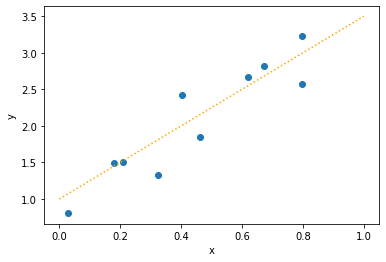

In [3]:
plt.scatter(x_train, y_train)
plt.plot(np.linspace(0, 1, 2), f(np.linspace(0, 1, 2)), color='orange', linestyle='dotted')
plt.xlabel('x')
plt.ylabel('y')

Now we define a linear regression model and "fit" the model to the training data set.

Note that we have to reshape `x` and `y`; see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) for details.

In [11]:
model = LinearRegression()
model.fit(x_train.reshape(-1, 1), y_train.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
x_train.reshape(-1, 1)

array([[0.32397177],
       [0.79806795],
       [0.67118411],
       [0.40116027],
       [0.79547921],
       [0.20993772],
       [0.61999642],
       [0.18005143],
       [0.02810886],
       [0.46221371]])

The model is trained, let's check how good it is. We generate a test data set with random `x` values and predict `y` values based on our model.

In [12]:
x_test = np.linspace(0, 1, 100)
y_test = model.predict(x_test.reshape(-1,1)).reshape(-1)

To verify the model performance, we plot the test data set and compare the learned relationship against the actual relationship.

Text(0, 0.5, 'y')

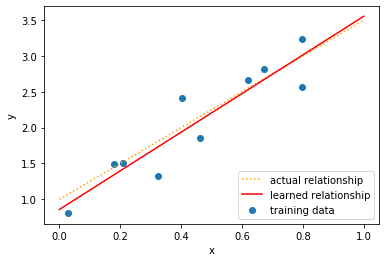

In [13]:
plt.scatter(x_train, y_train, label='training data')
plt.plot(np.linspace(0, 1, 2), f(np.linspace(0, 1, 2)), color='orange', linestyle='dotted', label='actual relationship')
plt.plot(x_test, y_test, color='red', label='learned relationship')
plt.legend(loc=4)
plt.xlabel('x')
plt.ylabel('y')

We can extract the model slope and intercept:

In [14]:
model.coef_, model.intercept_

(array([[2.69769184]]), array([0.85715866]))

The goodness of fit depends significantly on the random selection of `x` and the number of data points `n`. If you run the code again, you will get a different result, since `x` and `y` will be different. Also, if you increase `n`, you are more likely to get a good fit.

## Random seed

If you prefer to get reproducible results, you have to provide a seed value to the random number generator. Uncomment the line `np.random.seed(42)` at the top of the script, reset your kernal and run everything again. The results will always be the same. The random seed can be any value you want.

## sklearn data

Scikit-learn provides a wide range of sample data that you can play with:

In [16]:
from sklearn import datasets
[d for d in dir(datasets) if d.startswith('load')]

['load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine']

We will spend some time with the infamous [Iris dataset](https://scikit-learn.org/stable/datasets/index.html#iris-dataset) in the next couple of weeks. 

There's also tools for generating your own datasets:

In [9]:
[d for d in dir(datasets) if d.startswith('make')]

['make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_classification',
 'make_friedman1',
 'make_friedman2',
 'make_friedman3',
 'make_gaussian_quantiles',
 'make_hastie_10_2',
 'make_low_rank_matrix',
 'make_moons',
 'make_multilabel_classification',
 'make_regression',
 'make_s_curve',
 'make_sparse_coded_signal',
 'make_sparse_spd_matrix',
 'make_sparse_uncorrelated',
 'make_spd_matrix',
 'make_swiss_roll']

In [22]:
import pandas as pd
d = datasets.load_iris()
df = pd.DataFrame(d)
df.head()

ValueError: arrays must all be same length